In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [13]:
try:
    # Carregando os dados do primeiro arquivo
    df_geo = pd.read_csv( 'performance_voronoi.csv' )
    print( "\nDados do Algoritmo Geométrico:" )
    print( df_geo.head() )

    print( "-" * 30 )

    # Carregando os dados do segundo arquivo
    df_pix = pd.read_csv( 'performance_voronoi_pixel.csv' )
    print( "Dados do Algoritmo Pixel-based:" )
    print( df_pix.head() )

except FileNotFoundError:
    print( "Erro: Certifique-se de que os dois arquivos CSV foram enviados corretamente." )


Dados do Algoritmo Geométrico:
   numPontos  tempoMs
0          1      0.0
1          2      1.0
2          3      0.0
3          4      0.0
4          5      0.0
------------------------------
Dados do Algoritmo Pixel-based:
   numPontos  tempoMs
0          1     18.0
1          2     19.0
2          3     18.0
3          4     19.0
4          5     17.0



Gerando o gráfico de desempenho comparativo...


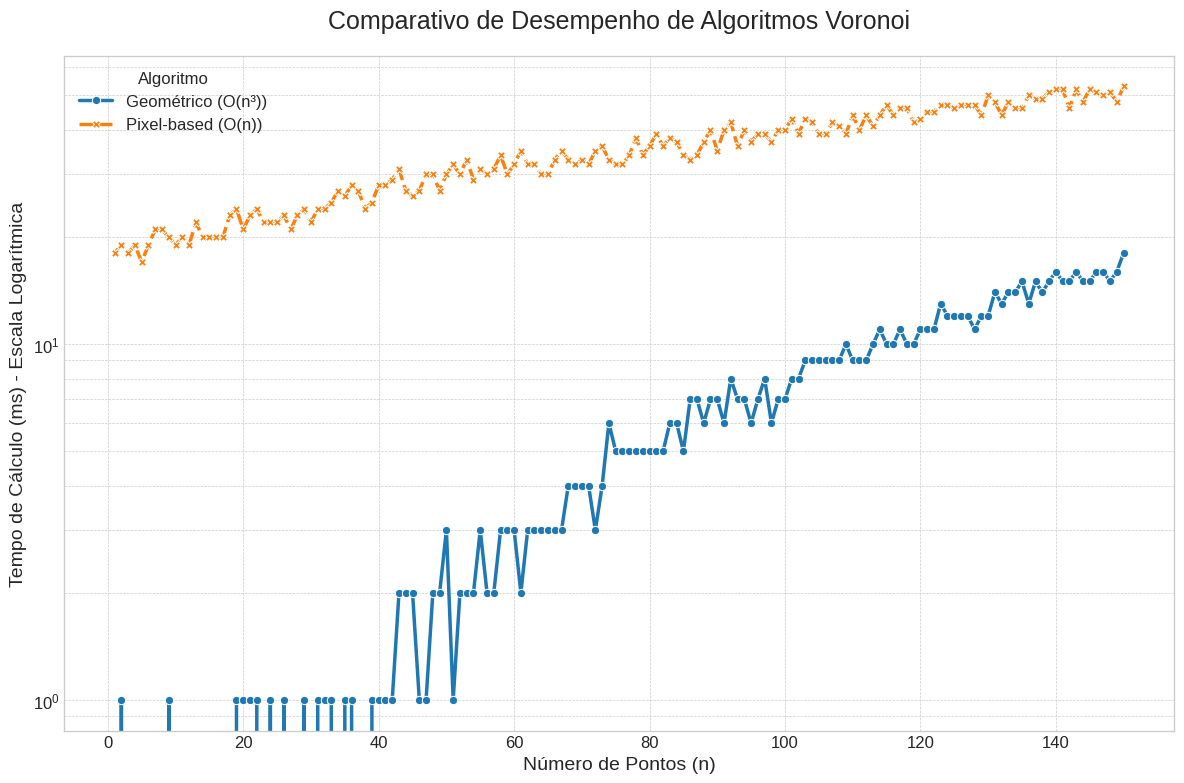

In [14]:

df_geo['algoritmo'] = 'Geométrico (O(n³))'
df_pix['algoritmo'] = 'Pixel-based (O(n))'
df_combined = pd.concat([df_geo, df_pix])

# --- Geração do Gráfico ---
print( "\nGerando o gráfico de desempenho comparativo..." )
plt.style.use( 'seaborn-v0_8-whitegrid' )
fig, ax = plt.subplots( figsize=( 12, 8 ) )

# O Seaborn utiliza a coluna 'algoritmo' para criar as duas linhas e a legenda
sns.lineplot(
    data=df_combined,
    x='numPontos',
    y='tempoMs',
    hue='algoritmo', # Cria uma linha para cada algoritmo
    style='algoritmo',
    markers=True,
    linewidth=2.5,
    ax=ax
)

ax.set_title( 'Comparativo de Desempenho de Algoritmos Voronoi', fontsize=18, pad=20 )
ax.set_xlabel( 'Número de Pontos (n)', fontsize=14 )
ax.set_ylabel( 'Tempo de Cálculo (ms) - Escala Logarítmica', fontsize=14 )
ax.legend( title='Algoritmo', fontsize=12 )
ax.grid( True, which='both', linestyle='--', linewidth=0.5 )

ax.set_yscale( 'log' )

plt.tight_layout()
plt.show()

#Existe diferença de custo computacional dependendo da distribuição de pontos?

**Análise para o Algoritmo Geométrico (O(n³))**

  A Resposta Teórica (A Hipótese):
  Sim, existe uma diferença. Embora a complexidade geral continue sendo cúbica (O(n3)), o tempo real de execução pode variar. O "pior caso" para este algoritmo ocorre quando os polígonos intermediários que ele precisa calcular e recortar têm muitos vértices.

  Distribuição Alinhada (Pontos em uma linha): Este é frequentemente um pior caso. As mediatrizes entre os pontos serão todas paralelas, o que pode criar polígonos muito longos e finos durante o recorte, exigindo mais processamento em cada passo.

  Distribuição Agrupada (Pontos em um cluster): Este pode ser um melhor caso. Com os pontos muito próximos, os recortes acontecem de forma mais "eficiente", potencialmente gerando polígonos intermediários mais simples e com menos vértices, o que acelera o cálculo.

  Distribuição Aleatória: Este é o caso médio, ficando entre os dois cenários acima.

**Análise para o Algoritmo Pixel-based (O(n))**

A Resposta Teórica (A Hipótese):
Não, a diferença de custo será insignificante. Este algoritmo é "ignorante" à geometria. Seu processo é fixo: para cada pixel na tela, ele mede a distância para todos os pontos. A posição dos pontos não altera o número total de cálculos, que é sempre (número de pixels) * (número de pontos). As pequenas variações que você possa ver no gráfico serão apenas "ruído" do sistema, não uma mudança fundamental no desempenho.